In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set(color_codes=True)

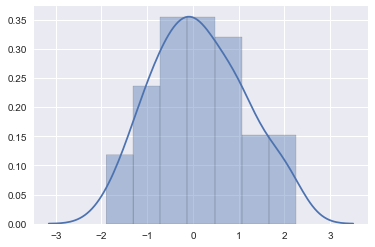

In [6]:
x = np.random.normal(size=100)
sns.distplot(x);

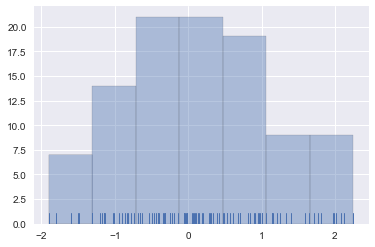

In [7]:
# 高度和下方标记的密集度是成正比的
sns.distplot(x, kde=False, rug=True);

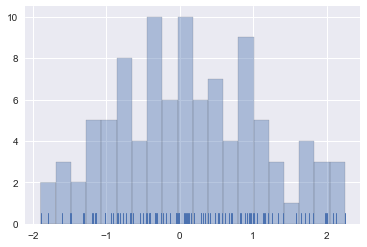

In [8]:
sns.distplot(x, bins=20, kde=False, rug=True);

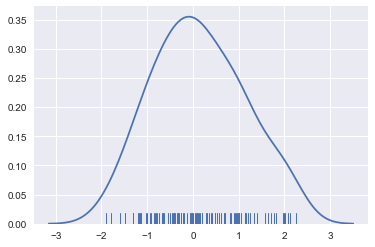

In [9]:
sns.distplot(x, hist=False, rug=True);

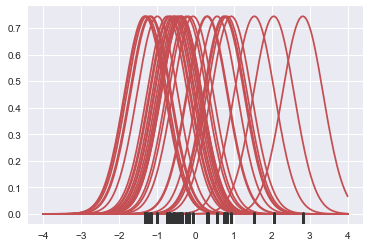

In [10]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:
    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color='r')

sns.rugplot(x, color=".2", linewidth=3);

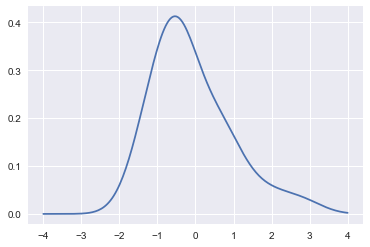

In [11]:
from scipy.integrate import trapz
density = np.sum(kernels, axis=0)
density /= trapz(density, support)
plt.plot(support, density);

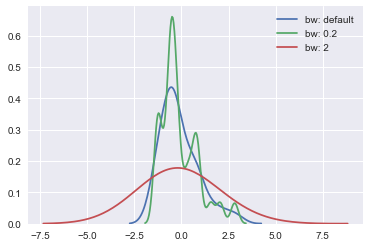

In [12]:
sns.kdeplot(x, label="bw: default")
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

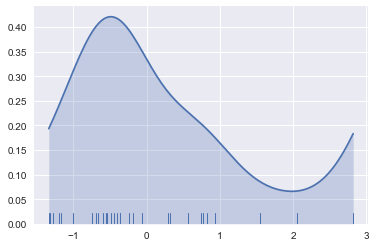

In [13]:
sns.kdeplot(x, shade=True, cut=0)
sns.rugplot(x);

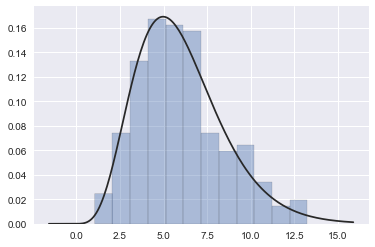

In [14]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma);

In [48]:
dfo=pd.read_csv('czk.mat.txt',delimiter='|')

In [88]:
#print dfo
df=dfo[(dfo['sid']==4658)]
df['pph'].map(lambda x:x*100)
df=df.sort_values('pph',ascending=False)
df=df[:10]
#print df

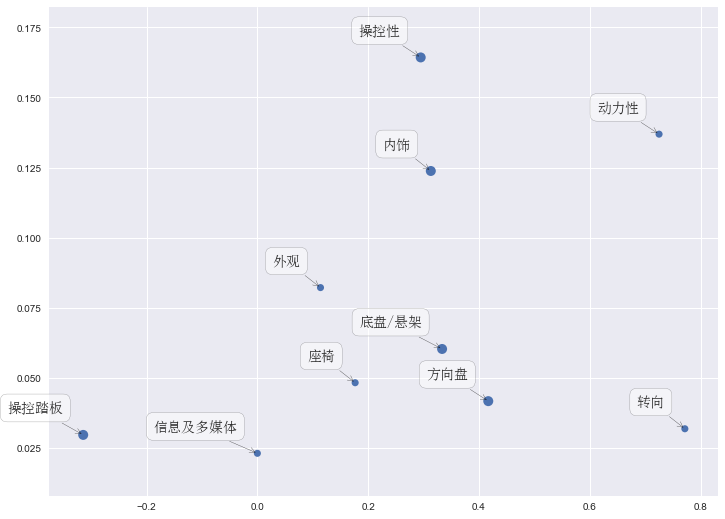

In [89]:
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"C:\\WINDOWS\\Fonts\\simsun.ttc", size=14)#C:\WINDOWS\Fonts
fig_size=[0,0]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.scatter(df['sent'],df['pph'],s=(100,50))
for label, x, y in zip(df['pmidx'], df['sent'], df['pph']):
    plt.annotate(
        label.decode('utf8'),
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'), fontproperties=font)

plt.show()